In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log2
import statistics

Read the file (.txt)

In [ ]:
def read_fasta(file_path):
    with open(file_path, 'r') as file:
        content = file.read().strip().split("\n")

    sequences = {"CpG": {}, "non_CpG": {}}
    current_type = None
    current_seq_id = None

    for line in content:
        line = line.strip()
        if line.startswith("CpG island sequences:"):
            current_type = "CpG"
        elif line.startswith("Non-CpG island sequences:"):
            current_type = "non_CpG"
        elif line.startswith(">"):
            current_seq_id = line[1:].strip()
            sequences[current_type][current_seq_id] = ""
        elif current_type and current_seq_id:
            sequences[current_type][current_seq_id] += line

    return sequences

file_path = "/content/CpG_island_sequences_2024.txt"
sequences = read_fasta(file_path)
print(sequences)

{'CpG': {'seq+_1': 'CATTCCGCCTTCTCTCCCGAGGTGGCGCGTGGGAGGTGT', 'seq+_2': 'GGAGGTGTTTTGCTCGGGTTCTGTAAGAATAGGCCAG', 'seq+_3': 'GCAGCTTCCCGCGGGATGCGCTCATCCCCTCTCG', 'seq+_4': 'CGGGGTTCCGCTCCCACCGCGCCGCGTTCGGCCGGT', 'seq+_5': 'TCCGCCTGCGAGATGTTTTCCGACGGACAATGATTCC', 'seq+_6': 'CACTCTCGGCGCCTCCCATGTTGATCCCAGCTC', 'seq+_7': 'CTCTGCGGGCGTCAGGACCCCTGGGCCCCGCCCCGC', 'seq+_8': 'CTCCACTCAGTCAATCTTTTGTCCCCGTATAAGG', 'seq+_9': 'CGGATTATCGGGGTGGCTGGGGGCGGCTGATTC', 'seq+_10': 'CGAATGCCCTTGGGGGTCACCCGGGAGGGA', 'seq+_11': 'ACTCCGGGCTCCGGCTTTGGCCAGCCCGCACCCCTGGTTGAGCCGGCCCGAGGGCCACCAGGGGGC', 'seq+_12': 'GCTCGATGTTCCTGCAGCCCCCCGCAGCAGCCCCACTCCCCGGCTCACCCTACGATTGGCTGGCCGCC', 'seq+_13': 'CCGAGCTCTGTGCTGTGATTGGTCACAGCCCGTGTCCG', 'seq+_14': 'CGGGCGCCGGGGCGGATACGAGGTGA', 'seq+_15': 'CGCGCAGAGGCCCAGCTCGGGGCGGTGTCCCGCGCCGGCGACTGCGGGCGGAGTTTCGCGAGGGC', 'seq+_16': 'CGAAGCGGGGCAGTGTGACGGCAGCGGTCCTGGGAGGCGCCCGCGCGCGTCGGAGCAGCTCCCCG', 'seq+_17': 'TCCTCCGCAGCCGTCACCGCCGGCCGTCGCCGCGCCCTGGCCTCCCGCACTCGCGCACTCCTGTCCGC', 

# CpG island sequences analysis


In [ ]:
cpg_sequences = list(sequences["CpG"].values())


counts = {
    "A": {"A": 0, "T": 0, "C": 0, "G": 0},
    "T": {"A": 0, "T": 0, "C": 0, "G": 0},
    "C": {"A": 0, "T": 0, "C": 0, "G": 0},
    "G": {"A": 0, "T": 0, "C": 0, "G": 0}
}

for seq in cpg_sequences:
  for i in range(len(seq)-1):
    current = seq[i]
    next = seq[i+1]
    counts[current][next] += 1


for current, transitions in counts.items():
  print(f'{current}:{transitions}')

# Convert counts to a pandas DataFrame
cpg_df = pd.DataFrame(counts).T  # Transpose to match rows and columns

# Print the matrix
print(cpg_df)

A:{'A': 8, 'T': 21, 'C': 24, 'G': 43}
T:{'A': 8, 'T': 32, 'C': 66, 'G': 61}
C:{'A': 38, 'T': 63, 'C': 137, 'G': 130}
G:{'A': 43, 'T': 50, 'C': 138, 'G': 130}
    A   T    C    G
A   8  21   24   43
T   8  32   66   61
C  38  63  137  130
G  43  50  138  130


In [ ]:
cpg_trans_probs = cpg_df.apply(lambda row: row/row.sum(), axis = 1)
print(cpg_trans_probs)

          A         T         C         G
A  0.083333  0.218750  0.250000  0.447917
T  0.047904  0.191617  0.395210  0.365269
C  0.103261  0.171196  0.372283  0.353261
G  0.119114  0.138504  0.382271  0.360111


# non CpG island sequences analysis

In [ ]:
non_cpg_sequences = list(sequences["non_CpG"].values())


counts = {
    "A": {"A": 0, "T": 0, "C": 0, "G": 0},
    "T": {"A": 0, "T": 0, "C": 0, "G": 0},
    "C": {"A": 0, "T": 0, "C": 0, "G": 0},
    "G": {"A": 0, "T": 0, "C": 0, "G": 0}
}

for seq in non_cpg_sequences:
  for i in range(len(seq)-1):
    current = seq[i]
    next = seq[i+1]
    counts[current][next] += 1

for current, transitions in counts.items():
  print(f'{current}:{transitions}')

# Convert counts to a pandas DataFrame
non_cpg_df = pd.DataFrame(counts).T  # Transpose to match rows and columns

# Print the matrix
print(non_cpg_df)

A:{'A': 55, 'T': 42, 'C': 37, 'G': 70}
T:{'A': 40, 'T': 121, 'C': 69, 'G': 65}
C:{'A': 55, 'T': 79, 'C': 81, 'G': 11}
G:{'A': 57, 'T': 54, 'C': 38, 'G': 45}
    A    T   C   G
A  55   42  37  70
T  40  121  69  65
C  55   79  81  11
G  57   54  38  45


In [ ]:
non_cpg_trans_probs = non_cpg_df.apply(lambda row: row/row.sum(), axis = 1)
print(non_cpg_trans_probs)

          A         T         C         G
A  0.269608  0.205882  0.181373  0.343137
T  0.135593  0.410169  0.233898  0.220339
C  0.243363  0.349558  0.358407  0.048673
G  0.293814  0.278351  0.195876  0.231959


# Length normalized score visualization

Log-odd ratio

In [ ]:
log_odd_ratio = np.log2(cpg_trans_probs/non_cpg_trans_probs)
print(log_odd_ratio)

          A         T         C         G
A -1.693897  0.087463  0.462972  0.384445
T -1.501061 -1.097996  0.756737  0.729236
C -1.236815 -1.029884  0.054799  2.859553
G -1.302567 -1.006973  0.964655  0.634573


Count the normalized scores

In [ ]:
cpg_scores = []
non_cpg_scores = []

for seq in cpg_sequences:
  score = 0
  for i in range(len(seq)-1):
    current = seq[i]
    next = seq[i+1]
    score += log_odd_ratio[current][next]

  normalized_score = score/len(seq)
  cpg_scores.append(normalized_score)

for seq in non_cpg_sequences:
  score = 0
  for i in range(len(seq)-1):
    current = seq[i]
    next = seq[i+1]
    score += log_odd_ratio[current][next]

  normalized_score = score/len(seq)
  non_cpg_scores.append(normalized_score)

print(f"cpg scores: {cpg_scores}")
print(f"non cpg scores: {non_cpg_scores}")

cpg scores: [0.2257874143128051, -0.1033289236985249, 0.3669935652646054, 0.6222672069824733, -0.16684253636821128, 0.09524886151728934, 0.5293390189502756, -0.34829600406207506, 0.2768953325510551, 0.11035833241688149, 0.4237587570066487, 0.3481835836840648, 0.11487150376450612, 0.5700521454746801, 0.6809299936684262, 0.5939485994096257, 0.6064825491331106, 0.3381916236241276, 0.7533158782548834, 0.8498086891150488, 0.6071158456850204, 0.7179663050948687]
non cpg scores: [-0.3104398201594218, -0.7433905117397133, -0.22056499549643266, -0.2467429867911156, -0.27262682767961777, -0.7060034685718887, -0.3398220243050967, -0.09727340228682613, 0.14733585394897397, -0.4246581511919092, 0.035791803209336365, -0.304182864117844, -0.55129581785314, -0.06970832469472621, -0.17325230360952998, -0.4703076499287748, 0.0321078266235839, -0.17351935714026004, -0.397118673721969, -0.19406331311509117]


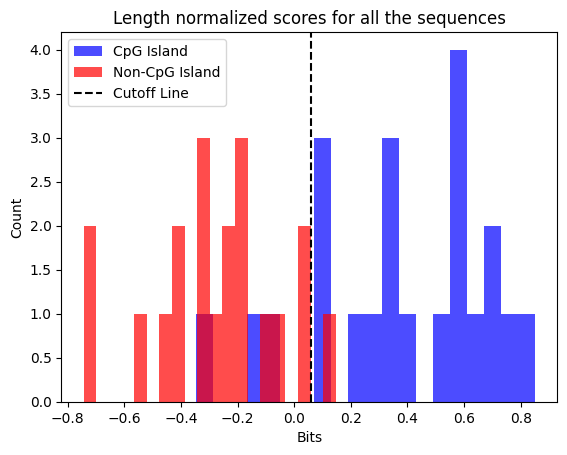

In [ ]:
# Plot the histograms
plt.hist(cpg_scores, bins=20, alpha=0.7, label='CpG Island', color='blue')
plt.hist(non_cpg_scores, bins=20, alpha=0.7, label='Non-CpG Island', color='red')

# Add a cutoff line
plt.axvline(x=0.06, color='black', linestyle='--', label='Cutoff Line')

# Add labels and legend
plt.xlabel('Bits')
plt.ylabel('Count')
plt.title('Length normalized scores for all the sequences')
plt.legend()

# Show the plot
plt.show()

# Prediction

In [ ]:
test = ['GCACCGGAGTCCGGAGAACTGAAGTCCGCCAAGACAAATTAGTTCACTGTAGAAGGGCTCCGAGGGA']

seq = test[0]

counts = {
    "A": {"A": 0, "T": 0, "C": 0, "G": 0},
    "T": {"A": 0, "T": 0, "C": 0, "G": 0},
    "C": {"A": 0, "T": 0, "C": 0, "G": 0},
    "G": {"A": 0, "T": 0, "C": 0, "G": 0}
}

for i in range(len(seq)-1):
  current = seq[i]
  next = seq[i+1]
  counts[current][next] += 1

for current, transitions in counts.items():
  print(f'{current}:{transitions}')

test_df = pd.DataFrame(counts).T
print('test transition matrix')
print(test_df)

test_trans_probs = test_df.apply(lambda row:row/row.sum(), axis = 1)
print('test transition probability')
print(test_trans_probs)

A:{'A': 6, 'T': 1, 'C': 4, 'G': 8}
T:{'A': 2, 'T': 2, 'C': 4, 'G': 2}
C:{'A': 4, 'T': 3, 'C': 5, 'G': 4}
G:{'A': 8, 'T': 4, 'C': 3, 'G': 6}
test transition matrix
   A  T  C  G
A  6  1  4  8
T  2  2  4  2
C  4  3  5  4
G  8  4  3  6
test transition probability
          A         T         C         G
A  0.315789  0.052632  0.210526  0.421053
T  0.200000  0.200000  0.400000  0.200000
C  0.250000  0.187500  0.312500  0.250000
G  0.380952  0.190476  0.142857  0.285714


Normalized score

In [ ]:
test_score = []
test = ['GCACCGGAGTCCGGAGAACTGAAGTCCGCCAAGACAAATTAGTTCACTGTAGAAGGGCTCCGAGGGA']

for seq in test:
  score = 0
  for i in range(len(seq)-1):
    current = seq[i]
    next = seq[i+1]
    score += log_odd_ratio[current][next]
    normalized_score = score/len(seq)
  test_score.append(normalized_score)

print(f"test score: {test_score}")

test score: [-0.12766393006297755]


Analysis

In [ ]:
mean_cpg = statistics.mean(cpg_scores)
mean_non_cpg = statistics.mean(non_cpg_scores)

median_cpg = statistics.median(cpg_scores)
median_non_cpg = statistics.median(non_cpg_scores)

print("Mean of CpG scores:", mean_cpg)
print("Median of CpG scores:", median_cpg)

print("Mean of non-CpG scores:", mean_non_cpg)
print("Median of non-CpG scores:", median_non_cpg)

Mean of CpG scores: 0.37332035189916296
Median of CpG scores: 0.39537616113562707
Mean of non-CpG scores: -0.2739867504310731
Median of non-CpG scores: -0.2596849072353667


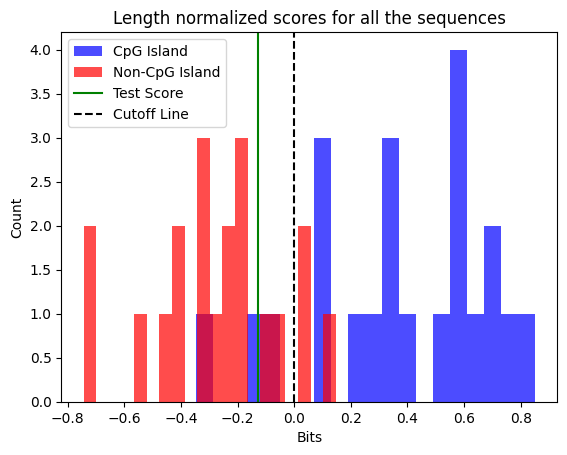

In [ ]:
# Plot the histograms
plt.hist(cpg_scores, bins=20, alpha=0.7, label='CpG Island', color='blue')
plt.hist(non_cpg_scores, bins=20, alpha=0.7, label='Non-CpG Island', color='red')
plt.axvline(x=test_score, color='green', linestyle='-', label='Test Score')

# Add a cutoff line at x=0
plt.axvline(x=0, color='black', linestyle='--', label='Cutoff Line')

# Add labels and legend
plt.xlabel('Bits')
plt.ylabel('Count')
plt.title('Length normalized scores for all the sequences')
plt.legend()

# Show the plot
plt.show()